In [1]:
##Estimación de indicadores de población ocupada en cultura
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpQlwfI5\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpQlwfI5\remotes4f4454497c98\cpyp-ipdp-funcionespgd-3fffa52/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
getwd()

[1] "c:/Users/claud/Documents/GitHub/pgd_cdmx/indicadores/cultura"

### Presupuesto

In [3]:
observado_presup<- read_csv("presup_cultural_cdmx.csv")%>%
rename(year=ciclo)%>%
mutate(year=as.numeric(year))

#predicciones de presupuestos
prediccion_presup <- read_csv("pred_presup_cultural_cdmx.csv")%>%
rename(year=ciclo)%>%
mutate(year=as.numeric(year))
#Pegar los datos de presupuestos observados con los predichos
presupuesto<-bind_rows(observado_presup,prediccion_presup)%>%
select(year,porcentaje_cultural)%>%
intervals("porcentaje_cultural", margen = 0.004 , año_base = 2024)
presupuesto

Rows: 5 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): ciclo, gasto_cultural, presupuesto_total_cdmx, porcentaje_cultural

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 21 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ciclo, porcentaje_cultural

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2020,0.13441080,0.13441080,0.13441080
2021,0.10123425,0.10123425,0.10123425
2022,0.09631327,0.09631327,0.09631327
2023,0.27720364,0.27720364,0.27720364
2024,0.35607523,0.35607523,0.35607523
2025,0.37883691,0.38035226,0.37732760
2026,0.44076674,0.44429992,0.43726165
2027,0.50269656,0.50875308,0.49671214
2028,0.56462638,0.57371475,0.55568198


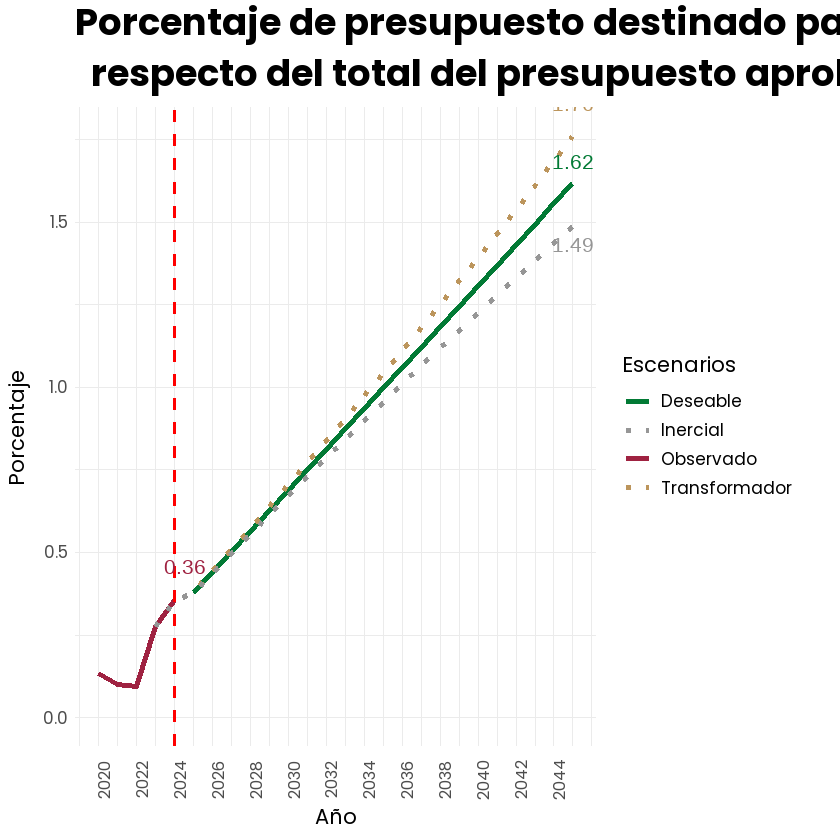

In [4]:
grafica_bonita(
  data = presupuesto,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de presupuesto destinado para cultura
  respecto del total del presupuesto aprobado",
      ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  desplazamiento_ano_base = c(0.5, 0.1),
  anios_etiquetas = c(2045),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/presup_cultura_estimada.png",
 width = 10, height = 6, dpi =  185, bg = "white")

### Valor agregado

In [5]:
va<- read_csv("valor_agregado_bruto_cdmx_proyecciones.csv")%>%
janitor::clean_names()%>%
rename(year=ano)%>%
mutate(year=as.numeric(year))%>%
select(year,valor)%>%
intervals("valor", margen = 0.004, año_base = 2024)
va

Rows: 38 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): concepto
dbl (2): año, valor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2008,8.419000,8.419000,8.419000
2009,8.704000,8.704000,8.704000
2010,8.272000,8.272000,8.272000
2011,7.967000,7.967000,7.967000
2012,7.681000,7.681000,7.681000
2013,7.566000,7.566000,7.566000
2014,7.792000,7.792000,7.792000
2015,7.763000,7.763000,7.763000
2016,7.296000,7.296000,7.296000


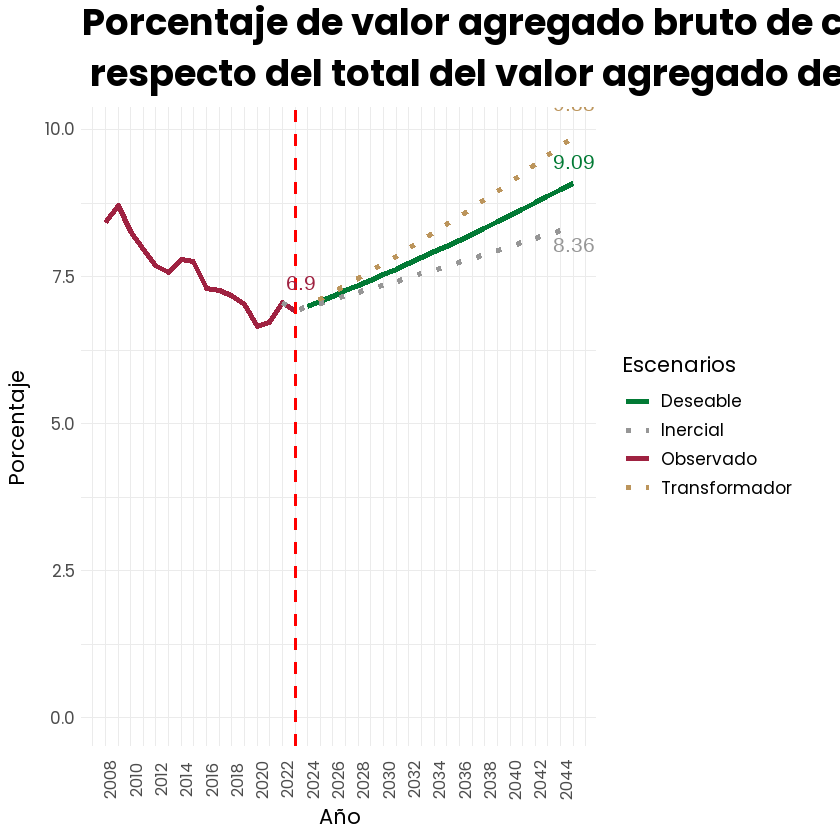

In [6]:
grafica_bonita(
  data = va,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de valor agregado bruto de cultura de la CDMX 
 respecto del total del valor agregado de cultura nacional",
      ano_base = 2023,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2023,
  desplazamiento_ano_base =c(0.5,0.5),
  anios_etiquetas = c(2045),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/va_cultura_estimada.png",
 width = 10, height = 6, dpi = 185, bg = "white")